In [84]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

In [57]:
# load prices data to one df
prices = [pd.read_csv("./round-1-island-data-bottle/prices_round_1_day_-2.csv",sep=";"),
          pd.read_csv("./round-1-island-data-bottle/prices_round_1_day_-1.csv",sep=";"),
          pd.read_csv("./round-1-island-data-bottle/prices_round_1_day_0.csv",sep=";")]
prices = pd.concat(prices, axis = 0)
prices['timestamp_new'] = (prices['day'] + 2) * 1000000 + prices['timestamp']

# load trades data to one df
trades1 = pd.read_csv("./round-1-island-data-bottle/trades_round_1_day_-2_nn.csv",sep=";")
trades2 = pd.read_csv("./round-1-island-data-bottle/trades_round_1_day_-1_nn.csv",sep=";")
trades3 = pd.read_csv("./round-1-island-data-bottle/trades_round_1_day_0_nn.csv",sep=";")

trades1['timestamp_new'] = trades1['timestamp']
trades2['timestamp_new'] = trades2['timestamp'] + 1000000
trades3['timestamp_new'] = trades3['timestamp'] + 2000000
trades = pd.concat([trades1, trades2, trades3], axis = 0)


In [141]:
# trade summary, average price and total quantity of each symbol and each timestamp
trades['total'] = trades['price'] * trades['quantity']
trades.rename(columns={'symbol':'product'}, inplace = True)
trade_summary = trades.groupby(['timestamp_new','product']).agg({'price':'mean', 'quantity':'sum', 'total':'sum'})

In [142]:
trade_summary['vwap'] = trade_summary['total']/ trade_summary['quantity']
trade_summary.reset_index(inplace = True)


In [171]:
data = pd.merge(prices, trade_summary, on = ['timestamp_new','product'], how="left")
data[['price','quantity','total','vwap']] = data.groupby('product')[['price','quantity','total','vwap']].fillna(method='ffill')
data[['price','quantity','total','vwap']] = data.groupby('product')[['price','quantity','total','vwap']].shift()
data.set_index('timestamp_new', inplace = True)

In [170]:
data.groupby('product')[['price','quantity','total','vwap']].shift()

price  quantity    total    vwap
timestamp_new                                   
0                 NaN       NaN      NaN     NaN
0                 NaN       NaN      NaN     NaN
100            9996.0       2.0  19992.0  9996.0
100            5003.0       1.0   5003.0  5003.0
200            5004.0       6.0  30024.0  5004.0
...               ...       ...      ...     ...
2999700        5048.0       1.0   5048.0  5048.0
2999800        5048.0       1.0   5048.0  5048.0
2999800        9995.0       2.0  19990.0  9995.0
2999900        5048.0       1.0   5048.0  5048.0
2999900        9995.0       2.0  19990.0  9995.0

[60000 rows x 4 columns]

KeyError: 'Fast10DayEMA'

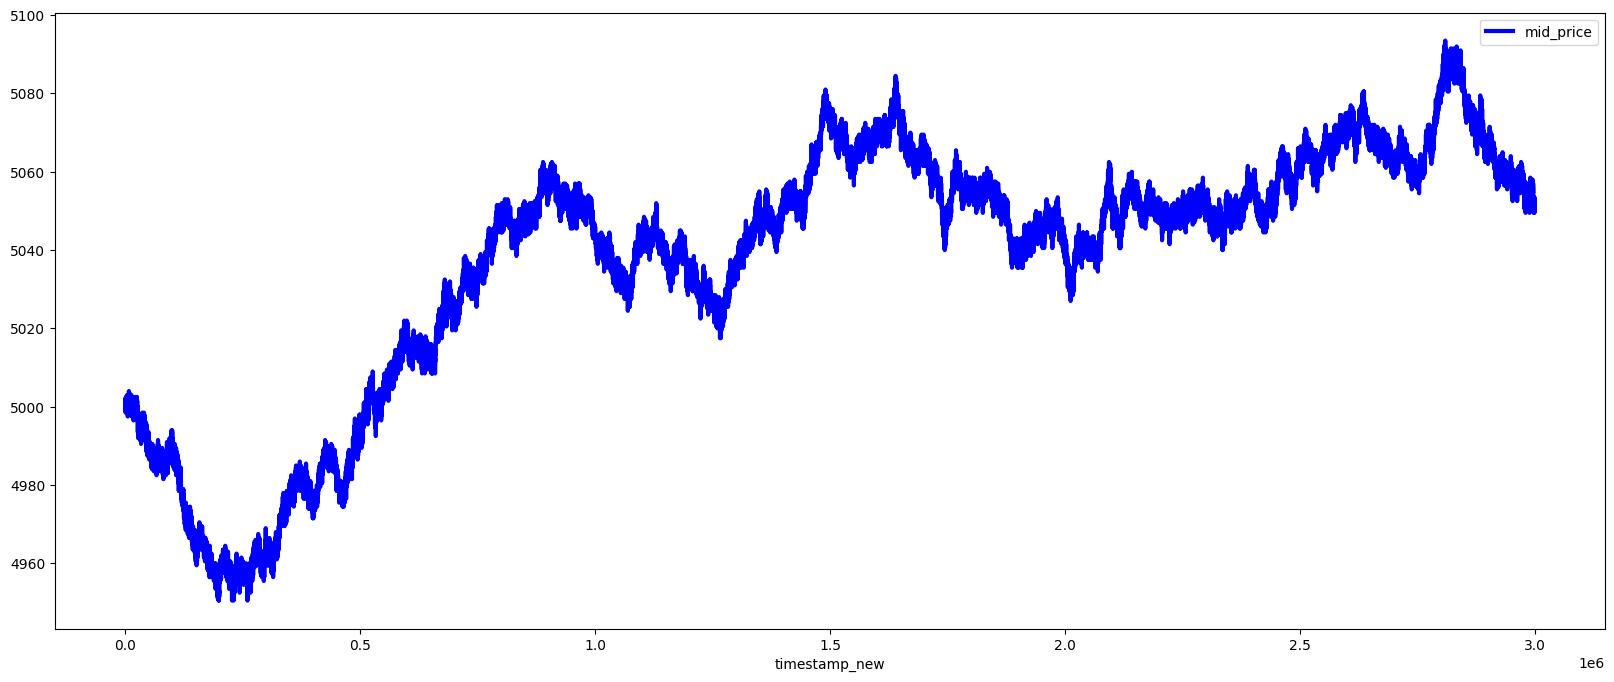

In [148]:
product = 'STARFRUIT'
plt.figure(figsize=[20,8])
data.query(f"product == '{product}'")['mid_price'].plot(color='blue', lw=3., legend=True)
data['Fast10DayEMA'].plot(color='y', lw=1., legend=True)
data['Slow40DayEMA'].plot(color='m', lw=1., legend=True)
plt.plot(data.loc[ data.Trades == 1 ].index, data.ClosePrice[data.Trades == 1 ], color='r', lw=0, marker='^', markersize=7, label='buy')
plt.plot(data.loc[ data.Trades == -1 ].index, data.ClosePrice[data.Trades == -1 ], color='g', lw=0, marker='v', markersize=7, label='sell')
plt.legend()
plt.show()

In [174]:
data

day  timestamp    product  bid_price_1  bid_volume_1  \
timestamp_new                                                         
0               -2          0  AMETHYSTS         9996             1   
0               -2          0  STARFRUIT         4997            26   
100             -2        100  AMETHYSTS        10000             5   
100             -2        100  STARFRUIT         5000             5   
200             -2        200  STARFRUIT         4997             1   
...            ...        ...        ...          ...           ...   
2999700          0     999700  STARFRUIT         5053             1   
2999800          0     999800  STARFRUIT         5047            27   
2999800          0     999800  AMETHYSTS         9995            27   
2999900          0     999900  STARFRUIT         5048             2   
2999900          0     999900  AMETHYSTS         9996             2   

               bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
timestamp_new                                                         
0                   9995.0          25.0          NaN           NaN   
0                      NaN           NaN          NaN           NaN   
100                 9995.0          20.0          NaN           NaN   
100                 4998.0           6.0       4997.0          20.0   
200                 4996.0          30.0          NaN           NaN   
...                    ...           ...          ...           ...   
2999700             5048.0          26.0          NaN           NaN   
2999800                NaN           NaN          NaN           NaN   
2999800                NaN           NaN          NaN           NaN   
2999900             5047.0          21.0          NaN           NaN   
2999900             9995.0          21.0          NaN           NaN   

               ask_price_1  ...  ask_price_2  ask_volume_2  ask_price_3  \
timestamp_new               ...                                           
0                    10004  ...      10005.0          25.0          NaN   
0                     5003  ...          NaN           NaN          NaN   
100                  10005  ...          NaN           NaN          NaN   
100                   5004  ...          NaN           NaN          NaN   
200                   5003  ...          NaN           NaN          NaN   
...                    ...  ...          ...           ...          ...   
2999700               5054  ...       5055.0          24.0          NaN   
2999800               5052  ...       5054.0          27.0          NaN   
2999800              10005  ...          NaN           NaN          NaN   
2999900               5054  ...          NaN           NaN          NaN   
2999900              10004  ...      10005.0          21.0          NaN   

               ask_volume_3  mid_price  profit_and_loss   price  quantity  \
timestamp_new                                                               
0                       NaN    10000.0              0.0     NaN       NaN   
0                       NaN     5000.0              0.0     NaN       NaN   
100                     NaN    10002.5              0.0  9996.0       2.0   
100                     NaN     5002.0              0.0  5003.0       1.0   
200                     NaN     5000.0              0.0  5004.0       6.0   
...                     ...        ...              ...     ...       ...   
2999700                 NaN     5053.5              0.0  5048.0       1.0   
2999800                 NaN     5049.5              0.0  5048.0       1.0   
2999800                 NaN    10000.0              0.0  9995.0       2.0   
2999900                 NaN     5051.0              0.0  5048.0       1.0   
2999900                 NaN    10000.0              0.0  9995.0       2.0   

                 total    vwap  
timestamp_new                   
0                  NaN     NaN  
0                  NaN     NaN  
100            19992.0  9996.0  
100             5003.0  

In [177]:
product = 'STARFRUIT'
endpoint= 5000
plt.figure(figsize=[200,80])
# data.query(f"product == '{product}'")['mid_price'][:endpoint].plot(color='blue', lw=2., legend=True)
data.query(f"product == '{product}'")['vwap'][:endpoint].plot(color='y', lw=2., legend=True)
data.query(f"product == '{product}'")['bid_price_1'][:endpoint].plot(color='g', lw=2., legend=True)
data.query(f"product == '{product}'")['ask_price_1'][:endpoint].plot(color='r', lw=2., legend=True)

<Axes: xlabel='timestamp_new'>

In [160]:
trade_summary.query(f"product == 'STARFRUIT'")['vwap']

1        5003.0
2        5004.0
3        5001.0
4        4997.0
5        4997.0
          ...  
13955    5050.0
13956    5055.0
13958    5050.0
13960    5049.0
13961    5048.0
Name: vwap, Length: 7741, dtype: float64

In [154]:
data.query(f"product == '{product}'")['vwap'].max()

10005.0

In [162]:
pd.merge(prices, trade_summary, on = ['timestamp_new','product'], how="left").query(f"product == '{product}'")

day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
1       -2          0  STARFRUIT         4997            26          NaN   
3       -2        100  STARFRUIT         5000             5       4998.0   
4       -2        200  STARFRUIT         4997             1       4996.0   
7       -2        300  STARFRUIT         4996            27          NaN   
9       -2        400  STARFRUIT         4995            20          NaN   
...    ...        ...        ...          ...           ...          ...   
59990    0     999500  STARFRUIT         5049            28          NaN   
59992    0     999600  STARFRUIT         5048             9       5047.0   
59995    0     999700  STARFRUIT         5053             1       5048.0   
59996    0     999800  STARFRUIT         5047            27          NaN   
59998    0     999900  STARFRUIT         5048             2       5047.0   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ...  \
1               NaN          NaN           NaN         5003  ...   
3               6.0       4997.0          20.0         5004  ...   
4              30.0          NaN           NaN         5003  ...   
7               NaN          NaN           NaN         5003  ...   
9               NaN          NaN           NaN         5002  ...   
...             ...          ...           ...          ...  ...   
59990           NaN          NaN           NaN         5056  ...   
59992          27.0          NaN           NaN         5054  ...   
59995          26.0          NaN           NaN         5054  ...   
59996           NaN          NaN           NaN         5052  ...   
59998          21.0          NaN           NaN         5054  ...   

       ask_volume_2  ask_price_3  ask_volume_3  mid_price  profit_and_loss  \
1               NaN          NaN           NaN     5000.0              0.0   
3               NaN          NaN           NaN     5002.0              0.0   
4               NaN          NaN           NaN     5000.0              0.0   
7               NaN          NaN           NaN     4999.5              0.0   
9               NaN          NaN           NaN     4998.5              0.0   
...             ...          ...           ...        ...              ...   
59990           NaN          NaN           NaN     5052.5              0.0   
59992           NaN          NaN           NaN     5051.0              0.0   
59995          24.0          NaN           NaN     5053.5              0.0   
59996          27.0          NaN           NaN     5049.5              0.0   
59998           NaN          NaN           NaN     5051.0              0.0   

       timestamp_new   price  quantity    total    vwap  
1                  0  5003.0       1.0   5003.0  5003.0  
3                100  5004.0       6.0  30024.0  5004.0  
4                200     NaN       NaN      NaN     NaN  
7                300     NaN       NaN      NaN     NaN  
9                400     NaN       NaN      NaN     NaN  
...              ...     ...       ...      ...     ...  
59990        2999500  5049.0       2.0  10098.0  5049.0  
59992        2999600  5048.0       1.0   5048.0  5048.0  
59995        2999700     NaN       NaN      NaN     NaN  
59996        2999800     NaN       NaN      NaN     NaN  
59998        2999900     NaN       NaN      NaN     NaN  

[30000 rows x 22 columns]

In [156]:
data.groupby('product')[['price','quantity','total','vwap']].fillna(method='ffill')

price  quantity    total    vwap
timestamp_new                                   
0              9996.0       2.0  19992.0  9996.0
0              5003.0       1.0   5003.0  5003.0
100            5003.0       1.0   5003.0  5003.0
100            5004.0       6.0  30024.0  5004.0
200            5004.0       6.0  30024.0  5004.0
...               ...       ...      ...     ...
2999700        5048.0       1.0   5048.0  5048.0
2999800        5048.0       1.0   5048.0  5048.0
2999800        5048.0       1.0   5048.0  5048.0
2999900        5048.0       1.0   5048.0  5048.0
2999900        5048.0       1.0   5048.0  5048.0

[60000 rows x 4 columns]

In [157]:
data

day  timestamp    product  bid_price_1  bid_volume_1  \
timestamp_new                                                         
0               -2          0  AMETHYSTS         9996             1   
0               -2          0  STARFRUIT         4997            26   
100             -2        100  AMETHYSTS        10000             5   
100             -2        100  STARFRUIT         5000             5   
200             -2        200  STARFRUIT         4997             1   
...            ...        ...        ...          ...           ...   
2999700          0     999700  STARFRUIT         5053             1   
2999800          0     999800  STARFRUIT         5047            27   
2999800          0     999800  AMETHYSTS         9995            27   
2999900          0     999900  STARFRUIT         5048             2   
2999900          0     999900  AMETHYSTS         9996             2   

               bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
timestamp_new                                                         
0                   9995.0          25.0          NaN           NaN   
0                      NaN           NaN          NaN           NaN   
100                 9995.0          20.0          NaN           NaN   
100                 4998.0           6.0       4997.0          20.0   
200                 4996.0          30.0          NaN           NaN   
...                    ...           ...          ...           ...   
2999700             5048.0          26.0          NaN           NaN   
2999800                NaN           NaN          NaN           NaN   
2999800                NaN           NaN          NaN           NaN   
2999900             5047.0          21.0          NaN           NaN   
2999900             9995.0          21.0          NaN           NaN   

               ask_price_1  ...  ask_price_2  ask_volume_2  ask_price_3  \
timestamp_new               ...                                           
0                    10004  ...      10005.0          25.0          NaN   
0                     5003  ...          NaN           NaN          NaN   
100                  10005  ...          NaN           NaN          NaN   
100                   5004  ...          NaN           NaN          NaN   
200                   5003  ...          NaN           NaN          NaN   
...                    ...  ...          ...           ...          ...   
2999700               5054  ...       5055.0          24.0          NaN   
2999800               5052  ...       5054.0          27.0          NaN   
2999800              10005  ...          NaN           NaN          NaN   
2999900               5054  ...          NaN           NaN          NaN   
2999900              10004  ...      10005.0          21.0          NaN   

               ask_volume_3  mid_price  profit_and_loss   price  quantity  \
timestamp_new                                                               
0                       NaN    10000.0              0.0  9996.0       2.0   
0                       NaN     5000.0              0.0  5003.0       1.0   
100                     NaN    10002.5              0.0  5003.0       1.0   
100                     NaN     5002.0              0.0  5004.0       6.0   
200                     NaN     5000.0              0.0  5004.0       6.0   
...                     ...        ...              ...     ...       ...   
2999700                 NaN     5053.5              0.0  5048.0       1.0   
2999800                 NaN     5049.5              0.0  5048.0       1.0   
2999800                 NaN    10000.0              0.0  5048.0       1.0   
2999900                 NaN     5051.0              0.0  5048.0       1.0   
2999900                 NaN    10000.0              0.0  5048.0       1.0   

                 total    vwap  
timestamp_new                   
0              19992.0  9996.0  
0               5003.0  5003.0  
100             5003.0  5003.0  
100            30024.0  